# Ejercicio 5

El archivo automobile-simple.csv contiene 11 atributos de automóviles de un total de 205 registros. Es una 
versión modificada y simplificada del dataset disponible en el repositorio UC 
https://archive.ics.uci.edu/ml/datasets/Automobile. La siguiente tabla contiene una breve descripción  e l s
atributos que contiene el archivo y caracterizan a cada vehío.

![image.png](attachment:ddf816b3-1e0d-45ea-8bc5-2a50a53e426d.png)lo

#### a) Para cada atributo indique si es Discreto, Continuo, Nominal u Ordinal.

#### b) Analice y Prepare los atributos del dataset:
- I. Calcule la correlación de los atributos y complete los valores faltantes. Basándose en la matriz de correlación, asigne valores representativos para price y horsepower. Compare dichos valores con la media y la mediana de estos atributos y reflexione sobre su importancia.
- II. Dado el siguiente diagrama de caja (boxplot) del atributo eco-rating, complete la siguiente tabla aproximando los valores visualmente y luego complete con los valores correctos
 
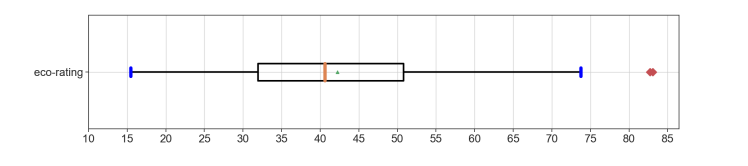

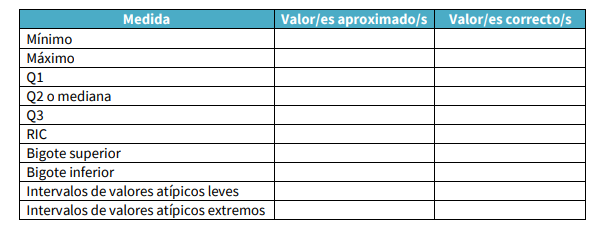

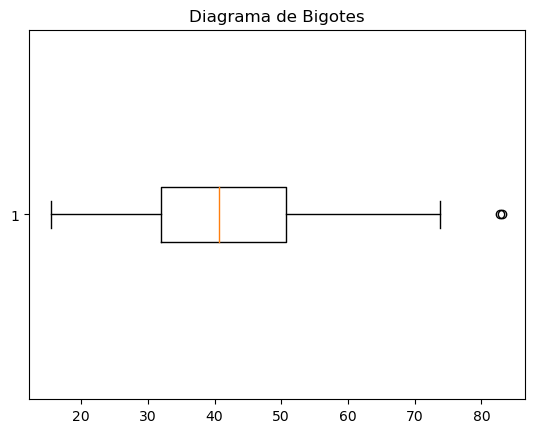

Mínimo: 15.501957160750948
Máximo: 83.08877400645349
Q1 (Cuartil 1): 31.972844085725644
Mediana (Cuartil 2): 40.61931082941276
Q3 (Cuartil 3): 50.771659612953854
Rango Intercuartílico (RIC): 18.79881552722821
Bigote Superior: 78.96988290379616
Bigote Inferior: 3.7746207948833295
Intervalos de valores atípicos leves: [82.72271776062964, 83.08877400645349]
Intervalos de valores atípicos extremos: []


In [14]:
import pandas as pd
import numpy as np
import chardet
def open_file(path):
    # open the path with automatic encoding
    with open(path, 'rb') as file:
        encoding = chardet.detect(file.read())
    
    return pd.read_csv(path, encoding=encoding['encoding'])

data = open_file("../Datos/automobile-simple.csv")
data = list(data['eco-rating'])

import numpy as np
import matplotlib.pyplot as plt


# Cálculos estadísticos
min_val = np.min(data)
max_val = np.max(data)
q1 = np.percentile(data, 25)
median = np.median(data)
q3 = np.percentile(data, 75)
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr
outlier_upper = [x for x in data if x > upper_whisker]
outlier_lower = [x for x in data if x < lower_whisker]

# Graficar el diagrama de bigotes (boxplot)
plt.boxplot(data, vert=False)
plt.title('Diagrama de Bigotes')
plt.show()

# Imprimir tabla con los valores
print("Mínimo:", min_val)
print("Máximo:", max_val)
print("Q1 (Cuartil 1):", q1)
print("Mediana (Cuartil 2):", median)
print("Q3 (Cuartil 3):", q3)
print("Rango Intercuartílico (RIC):", iqr)
print("Bigote Superior:", upper_whisker)
print("Bigote Inferior:", lower_whisker)
print("Intervalos de valores atípicos leves:", outlier_upper)
print("Intervalos de valores atípicos extremos:", outlier_lower)



#### c) Realice el entrenamiento de un perceptrón para que aprenda a clasificar si un auto es ecológico. Tenga en cuenta los siguientes pasos:
- I. Utilice el atributo eco-rating para generar un nuevo atributo binario que determine si un auto es
ecológico o no. Un auto es considerado ecológico si el valor de eco-rating supera la media de
dicho atributo.
- II. Genere y compare 3 modelos utilizando diferentes normalizaciones (Sin normalizar,
normalización lineal, normalización estándar.
- III. Teniendo en cuenta la matriz de correlación del punto b) repita el punto II) eliminando dos
atributos fuertemente correlacionados (uno negativo y otro positivo). Compare y reflexiones
sobre los resultados obtenidos